# Neural Networks for Handwritten Digit Recognition, Multiclass


In [1]:
import warnings

import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.nn import Linear, ReLU, Sequential
from torch.utils.data import DataLoader, TensorDataset
from utils import display_digit, load_data, plot_loss_tf, widgvis

warnings.simplefilter(action="ignore", category=FutureWarning)

torch.set_default_dtype(torch.float64)

In [2]:
X, y = load_data()
y = y.reshape(
    -1,
)

print("The shape of X is: " + str(X.shape))
print("The shape of y is: " + str(y.shape))

The shape of X is: torch.Size([5000, 400])
The shape of y is: torch.Size([5000])


In [7]:
X.shape

torch.Size([5000, 400])

In [35]:
print("The first element of y is: ", y[0])
print("The last element of y is: ", y[-1])

The first element of y is:  tensor(0, dtype=torch.uint8)
The last element of y is:  tensor(9, dtype=torch.uint8)


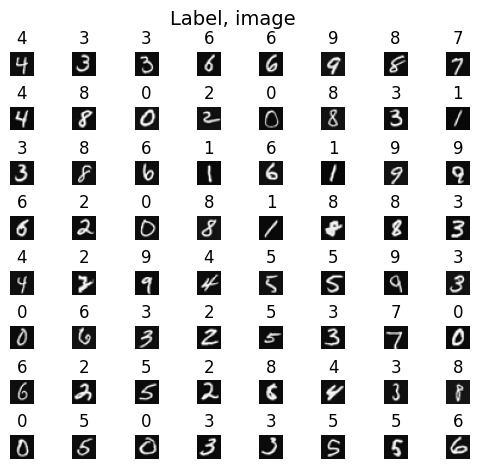

In [36]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  # [left, bottom, right, top]

# fig.tight_layout(pad=0.5)
widgvis(fig)
for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap="gray")

    # Display the label above the image
    ax.set_title(y[random_index].item())
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

## Define the model


In [44]:
torch.manual_seed(12)
model = Sequential(Linear(400, 25), ReLU(), Linear(25, 15), ReLU(), Linear(15, 10))

cost_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

epochs = 100
dataloader = DataLoader(TensorDataset(X, y), batch_size=32)

loss_history = []
for epoch in range(epochs):
    print(f"epoch {epoch+1}/{epochs}")
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()

        output = model(inputs)

        loss = cost_fun(output, labels)

        loss.backward()

        optimizer.step()

    loss_history.append(loss.item())

    print("epoch {}, loss {}".format(epoch + 1, loss.item()))

epoch 1/100
epoch 1, loss 2.3830295069483483
epoch 2/100
epoch 2, loss 1.9291581633726862
epoch 3/100
epoch 3, loss 1.0377583046823604
epoch 4/100
epoch 4, loss 0.7516108236933863
epoch 5/100
epoch 5, loss 0.5344007976380772
epoch 6/100
epoch 6, loss 0.9012363143415516
epoch 7/100
epoch 7, loss 1.930010931826233
epoch 8/100
epoch 8, loss 1.610430729541242
epoch 9/100
epoch 9, loss 1.274781306070636
epoch 10/100
epoch 10, loss 0.43299937388389487
epoch 11/100
epoch 11, loss 0.4111658538300751
epoch 12/100
epoch 12, loss 0.33872038831371754
epoch 13/100
epoch 13, loss 0.4554324190970964
epoch 14/100
epoch 14, loss 0.42693006040876713
epoch 15/100
epoch 15, loss 0.35551863062370614
epoch 16/100
epoch 16, loss 0.27123569848683865
epoch 17/100
epoch 17, loss 0.21697535180431793
epoch 18/100
epoch 18, loss 0.18924363614907863
epoch 19/100
epoch 19, loss 0.1619345631549068
epoch 20/100
epoch 20, loss 0.1471417846661342
epoch 21/100
epoch 21, loss 0.13350082552402034
epoch 22/100
epoch 22, los

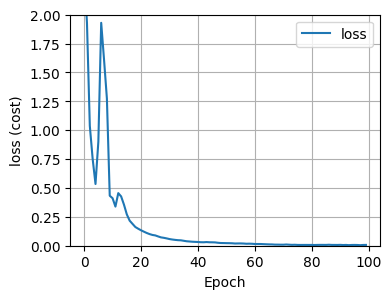

In [45]:
plot_loss_tf(loss_history)

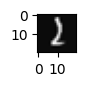

 predicting a Two: 
tensor([[-29.7972, -10.7772,  -1.1477,  -4.3213, -19.8302, -30.4992, -21.9307,
          -6.0253, -10.9096, -22.2224]], grad_fn=<AddmmBackward0>)
 Largest Prediction index: 2


In [46]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model(image_of_two.reshape(1, 400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {torch.argmax(prediction)}")

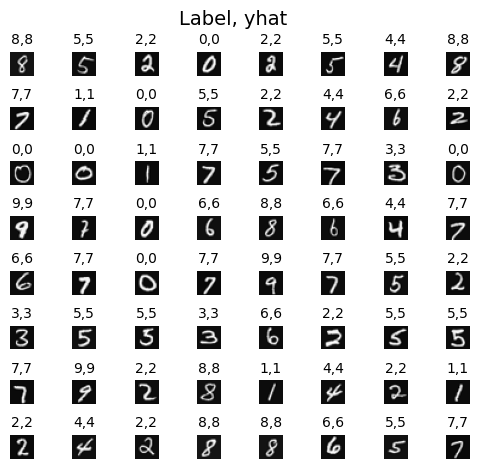

In [47]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  # [left, bottom, right, top]
widgvis(fig)
for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap="gray")

    # Predict using the Neural Network
    prediction = model(X[random_index].reshape(1, 400))
    prediction_p = torch.softmax(prediction, dim=1)
    yhat = torch.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index].item()},{yhat}", fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [48]:
yhat = torch.argmax(model(X), dim=1)
print(f"{(yhat != y).sum()} errors out of {len(y)} images")

68 errors out of 5000 images
